### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

### ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


#### Дисциплина: Методы машинного обучения

##### Студент: Мухамедияр Адиль
##### Группа: НКНбд-01-20

## Москва 2023
***

# Вариант №7


### Постановка задачи:

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/alcohol 

4. Визуализация для независимой переменной – эмпирическая функция распределения 

5. Визуализация для зависимой переменной – диаграмма размаха 

6. Показатель качества регрессии – MSE (mean squared error) 

## Решение:

### Пункт 1

Исправляем ошибку при обращении к датасету:


In [67]:
!pip install -q tfds-nightly

Добавляем библиотеки, которыми мы воспользуемся в дальнейшем:

In [68]:
import tensorflow_datasets as tfds
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Model

Считываем из TFDS набор данных "wine_quality":

In [69]:
ds = tfds.load("wine_quality", split='train') 
ds

<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

Преобразуем объект PrefetchDataset в датафрейм:

In [70]:
df = tfds.as_dataframe(ds)
df.head()


,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


Удаляем ненужные столбцы из датафрейма:


In [71]:
df.drop(columns=['features/chlorides', 'features/fixed acidity', 'features/citric acid', 'features/residual sugar', 'features/sulphates', 'features/total sulfur dioxide', 'features/volatile acidity', 'features/free sulfur dioxide', 'features/pH', 'quality'],inplace=True)
df.head()

,features/alcohol,features/density
0,9.0,1.00080
1,12.2,0.99110
2,11.2,0.99076
3,9.0,0.99672
4,12.0,0.99016


Вычислим матрицу корреляции признаков:

In [72]:
df.corr()

,features/alcohol,features/density
features/alcohol,1.000000,-0.780138
features/density,-0.780138,1.000000


Прошу заметить что наибольшее значение корреляции имеет одна пара признаков, а именно элементы матрицы с индексами 11 и 22 *(равна 1.000000)*. Так же наименьшее значение одна пара признаков, а именно элементы матрицы с индексами 12 и 21 *(равна -0.780138)*.

### Пункт 2

In [73]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

In [74]:
samples = df['features/alcohol'] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

In [75]:
df_ECDF = pd.DataFrame(ylist, columns=['features/alcohol'],index=xlist)
df_ECDF


,features/alcohol
8.0000,0.000408
8.0124,0.000408
8.0248,0.000408
8.0372,0.000408
8.0496,0.000408
...,...
14.1380,0.999796
14.1504,0.999796
14.1628,0.999796
14.1752,0.999796


Визуализируем эмпирическую функцию распределения для независимой переменной

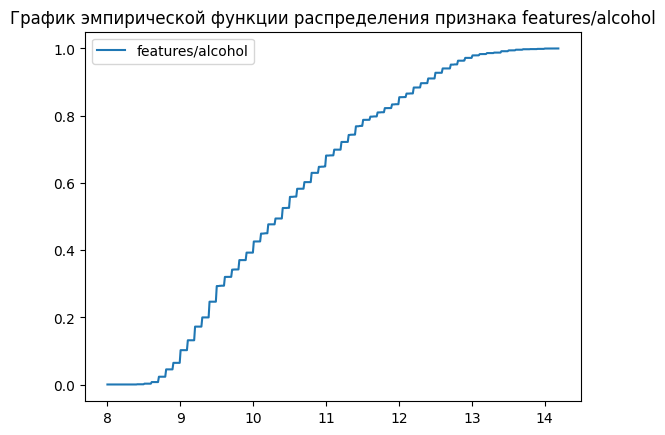

In [76]:
df_ECDF.plot.line(title='График эмпирической функции распределения признака features/alcohol');

Тут же мы изуализируем диаграмму размаха для зависимой переменной

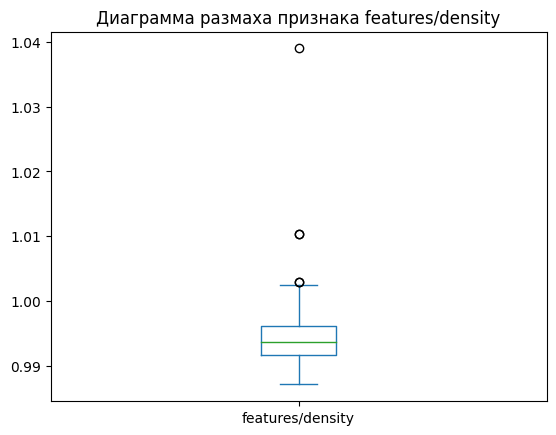

In [77]:
df['features/density'].plot.box(title='Диаграмма размаха признака features/density');

### Пункт 3

In [78]:
x = df['features/density'].values.reshape(-1, 1)
y = df['features/alcohol'].values

In [79]:
model = LinearRegression().fit(x, y)

y_pred = model.predict(x)

l = r2_score(y, y_pred)

print("R^2 ",l)

R^2  0.6086142361997957


In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

tf.random.set_seed(10)

model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=60, verbose=False)

y_pred = model.predict(x)

l = r2_score(y, y_pred)

print("R^2 ",l)

154/154 [==============================] - 0s 2ms/step
R^2  -0.019096816457412347


### Пункт 4

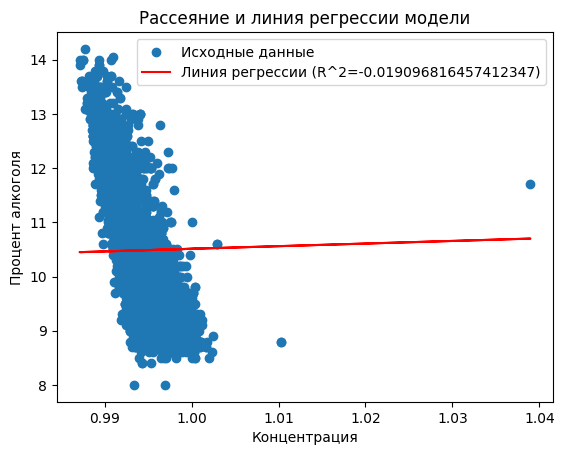

In [81]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='Исходные данные')
ax.plot(x, y_pred, color='red', label=f'Линия регрессии (R^2={l})')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Процент алкоголя')
ax.set_title('Рассеяние и линия регрессии модели')
ax.legend()
plt.show()

### Пункт 5

Из библиотеки sklearn берем train_test_split для деление датасета на train и test. Следом создаем слой:

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

normalizer = tf.keras.layers.Normalization()
normalizer(x_train).numpy()

feature = np.array(x_train)

feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(1,)) 
feature_normalizer.adapt(feature)

feature_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=1)
])

feature_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


### Пункт 6

#### 1

In [85]:

inputs = Input(shape=(x_train.shape[1],)) # ввод

normalized = normalizer(inputs) #нормализация

outputs = Dense(1)(normalized) # вывод через 1 слой
lin_reg_model = Model(inputs, outputs) #лин. регрессия

outputs = Dense(1, kernel_regularizer=regularizers.l2(0.01))(normalized) #выводии под регуляризации l2
ridge_model = Model(inputs, outputs) #модель l2

outputs = Dense(1, kernel_regularizer=regularizers.l1(0.01))(normalized) #вывод l1
lasso_model = Model(inputs, outputs) #модель l1

#компилируем
lin_reg_model.compile(optimizer='adam', loss='mse')
ridge_model.compile(optimizer='adam', loss='mse')
lasso_model.compile(optimizer='adam', loss='mse')

#подчсчет
history_lin_reg = lin_reg_model.fit(x_train, y_train, epochs=50, verbose=0)
history_ridge = ridge_model.fit(x_train, y_train, epochs=50,  verbose=0)
history_lasso = lasso_model.fit(x_train, y_train, epochs=50, verbose=0)

#проверка
y_pred_lin_reg = lin_reg_model.predict(x_test)
y_pred_ridge = ridge_model.predict(x_test)
y_pred_lasso = lasso_model.predict(x_test)
#считаем метрику
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)


print("Регресоры на базе следующих моделей множественной регрессии: ")
print("Линейная регрессия ", mse_lin_reg)
print("Гребневая регрессия ", mse_ridge)
print("Лассо регрессия ", mse_lasso)


46/46 [==============================] - 0s 2ms/step
Регресоры на базе следующих моделей множественной регрессии: 
Линейная регрессия  8.332326
Гребневая регрессия  3.2013648
Лассо регрессия  2.646475


#### 2

Визуализируем кривые обучения для лучшего регрессора(берем минимально значение)

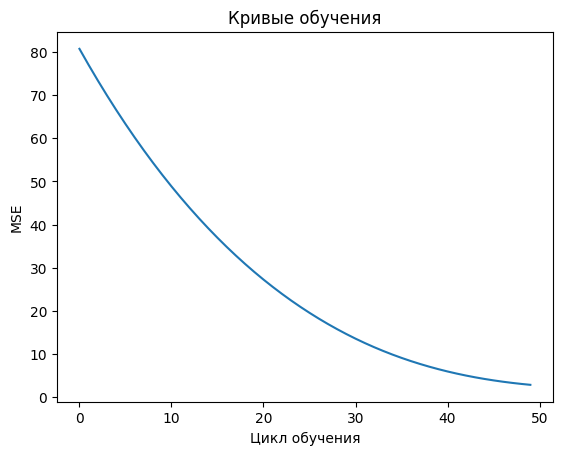

In [87]:
plt.plot(history_lasso.history['loss'])
plt.title('Кривые обучения')
plt.xlabel('Цикл обучения')
plt.ylabel('MSE')
plt.show()